<a href="https://colab.research.google.com/github/OmPShinde/DC-Micro-Project/blob/main/Modulation_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a binary bit stream (e.g., 10101): 1011


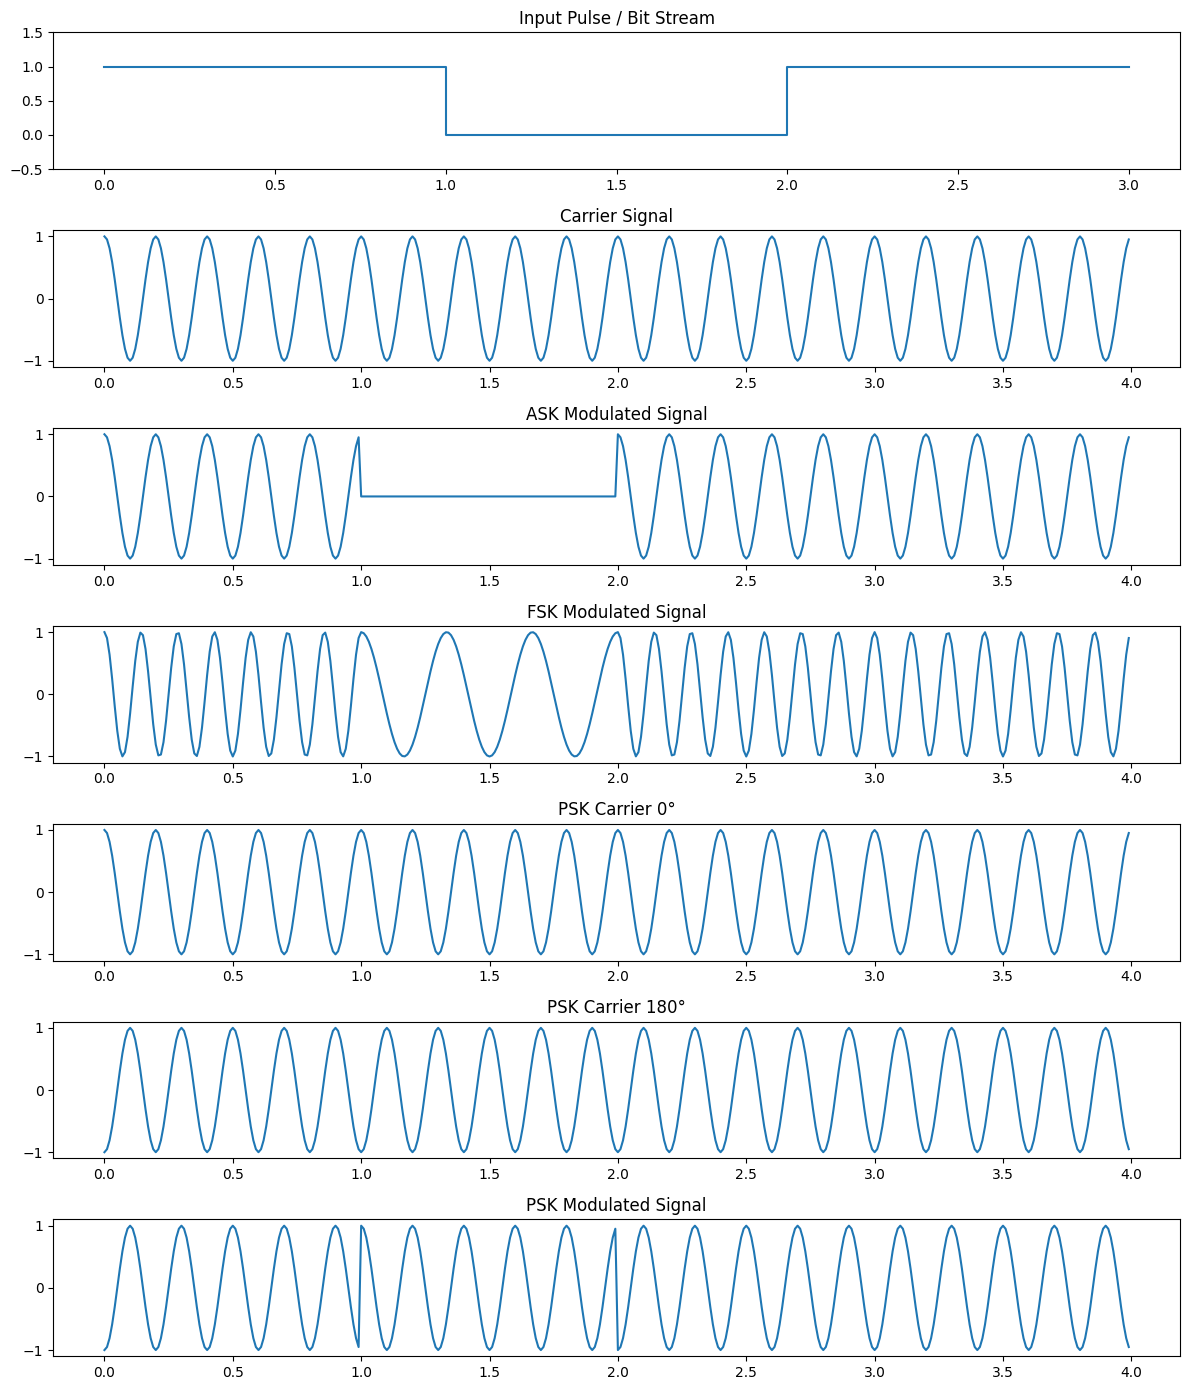

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# User input
bit_stream = input("Enter a binary bit stream (e.g., 10101): ")
data_bits = np.array([int(b) for b in bit_stream])

# Parameters
Tb = 1          # bit duration
Fs = 100        # sampling frequency
t = np.arange(0, Tb, 1/Fs)  # time vector for one bit

# Carrier frequencies
fc = 5
fc_fsk0 = 3
fc_fsk1 = 7

# Initialize signals
pulse_signal = np.array([])
carrier_signal = np.array([])
ask_signal = np.array([])
fsk_signal = np.array([])
psk0_carrier = np.array([])
psk180_carrier = np.array([])
psk_signal = np.array([])  # Actual PSK modulated signal

# Generate signals
for bit in data_bits:
    # Pulse
    pulse_signal = np.concatenate((pulse_signal, np.full_like(t, bit)))

    # Carrier
    carrier_signal = np.concatenate((carrier_signal, np.cos(2*np.pi*fc*t)))

    # ASK
    ask_bit = bit * np.cos(2 * np.pi * fc * t)
    ask_signal = np.concatenate((ask_signal, ask_bit))

    # FSK
    f = fc_fsk1 if bit == 1 else fc_fsk0
    fsk_bit = np.cos(2 * np.pi * f * t)
    fsk_signal = np.concatenate((fsk_signal, fsk_bit))

    # PSK carriers
    psk0_carrier = np.concatenate((psk0_carrier, np.cos(2*np.pi*fc*t)))       # 0 degree
    psk180_carrier = np.concatenate((psk180_carrier, np.cos(2*np.pi*fc*t + np.pi)))  # 180 degree

    # PSK modulated signal (0->0°, 1->180°)
    psk_bit = np.cos(2*np.pi*fc*t + bit*np.pi)
    psk_signal = np.concatenate((psk_signal, psk_bit))

# Time vector for full signal
time = np.arange(0, Tb*len(data_bits), 1/Fs)

# Plot all waveforms
plt.figure(figsize=(12, 14))

plt.subplot(7,1,1)
plt.step(np.arange(len(data_bits))*Tb, data_bits, where='post')
plt.title("Input Pulse / Bit Stream")
plt.ylim(-0.5, 1.5)

plt.subplot(7,1,2)
plt.plot(time, carrier_signal)
plt.title("Carrier Signal")

plt.subplot(7,1,3)
plt.plot(time, ask_signal)
plt.title("ASK Modulated Signal")

plt.subplot(7,1,4)
plt.plot(time, fsk_signal)
plt.title("FSK Modulated Signal")

plt.subplot(7,1,5)
plt.plot(time, psk0_carrier)
plt.title("PSK Carrier 0°")

plt.subplot(7,1,6)
plt.plot(time, psk180_carrier)
plt.title("PSK Carrier 180°")

plt.subplot(7,1,7)
plt.plot(time, psk_signal)
plt.title("PSK Modulated Signal")

plt.tight_layout()
plt.show()
